In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/data.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

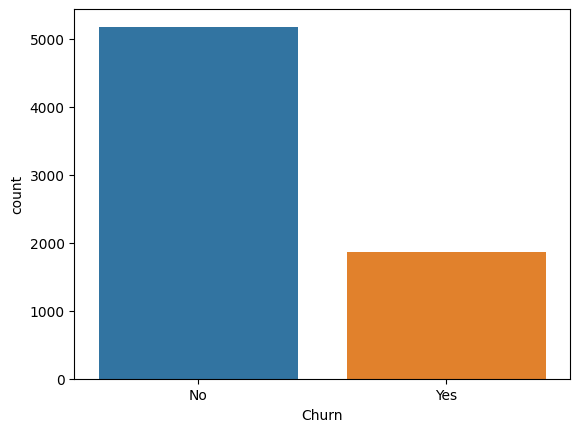

In [7]:
sns.countplot(data=df, x="Churn")

In [11]:

# 일단 수치형 변수가 뭐가 있는지 알아야함
# df.dtypes #SeniorCitizen , tenure , MonthlyCharges , TotalCharges



# Churn 값 숫자로 변경
df["Churn"].value_counts() #No -> 0 , YES - > 1
df["Churn"] = df["Churn"].replace("No", 0).replace("Yes",1)


# 수치형 변수랑 + churn만 가져오기
nums_df = df.iloc[:,[1,4,17,18,19]]

nums_df_0 = nums_df[nums_df["Churn"] == 0]
nums_df_1 = nums_df[nums_df["Churn"] == 1]

print(nums_df_0.shape , nums_df_1.shape)

fig, axes = plt.subplots(nrows=1, ncols=4,figsize = (30,10))

for i,col in enumerate(nums_df.columns):
  if i == 4:
    break
  sns.distplot(nums_df_0[col],ax = axes[i],kde=False,bins=50)
  sns.distplot(nums_df_1[col],ax = axes[i],kde=False,bins=50)
  plt.legend(("No Churn", "Churn"))

KeyError: 'Churn'

In [13]:
nunique = df.nunique()
category_col = nunique[nunique < 5]
category_col #가지고 있는 값의 개수
category_col_name = category_col.index.tolist()
# print(len(category_col_name))


cate_df = df.loc[:,category_col_name]


IndexError: index 3 is out of bounds for axis 0 with size 3

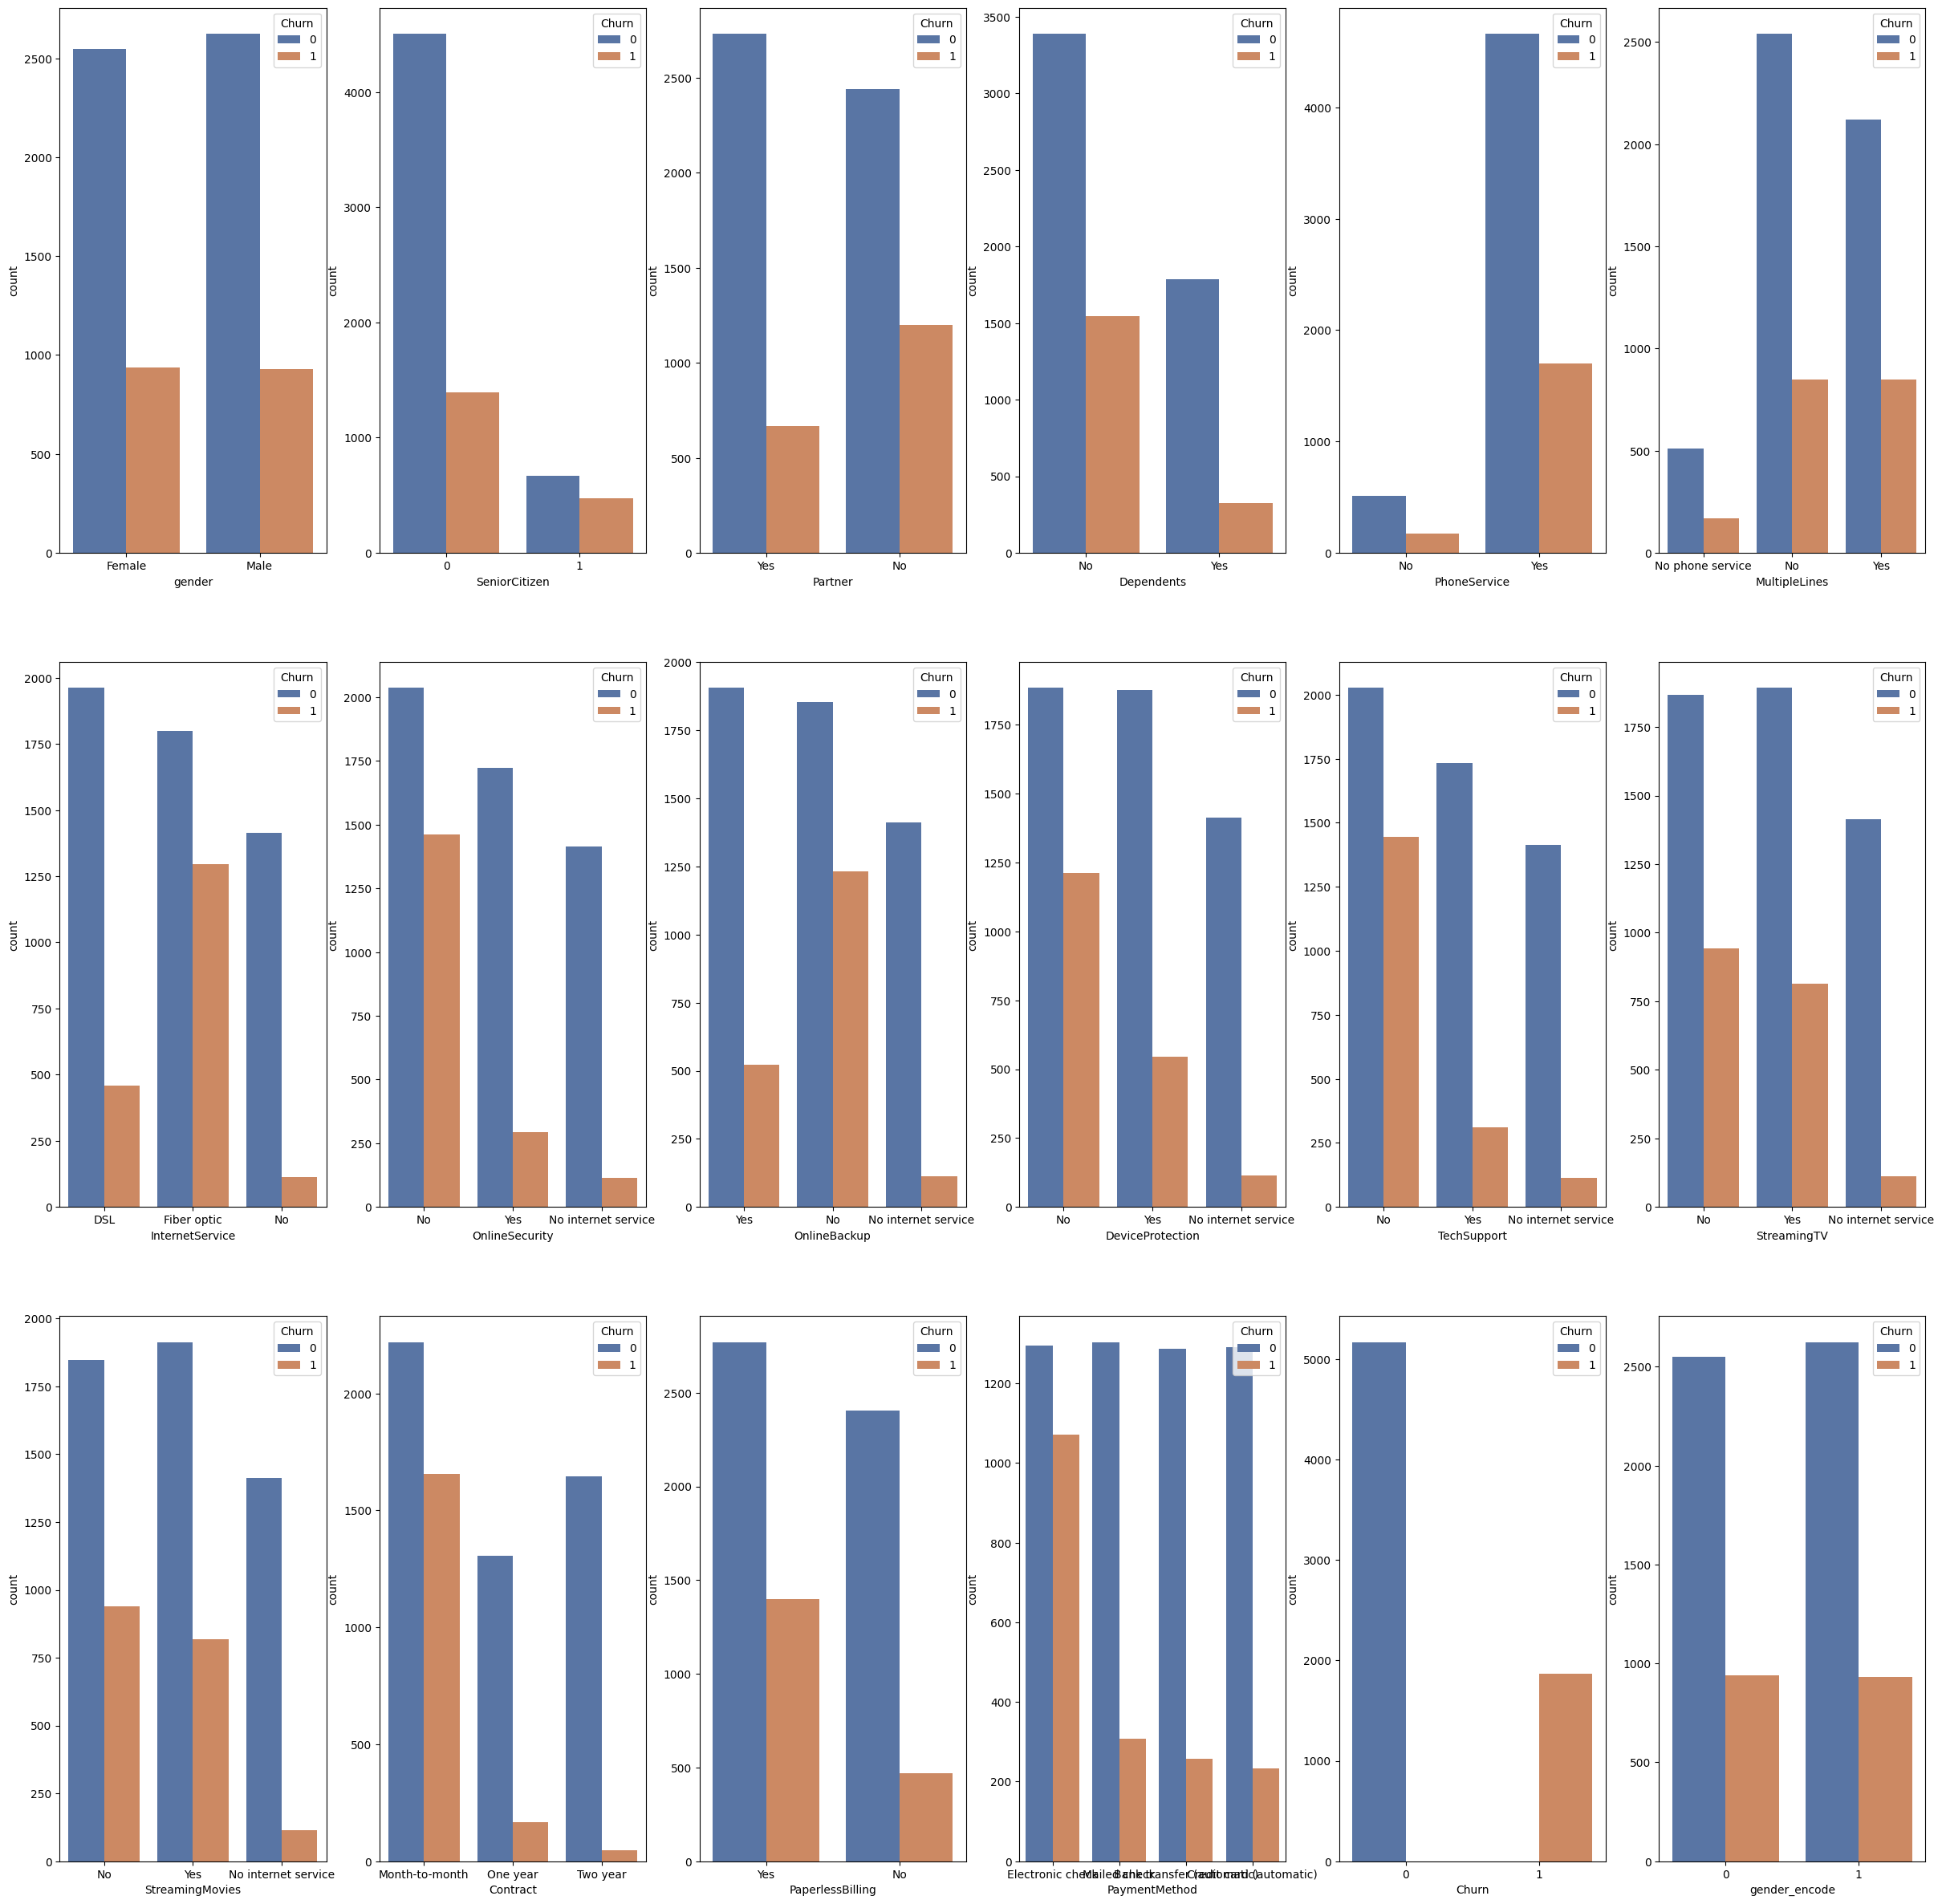

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=6,figsize = (30,30))

for idx, cate in enumerate(category_col_name):
  sns.countplot(data=df, x=cate, ax=axes[idx//6][idx%6], hue='Churn',palette = 'deep')

In [15]:
refine_nums_df = nums_df.iloc[:,[0,1,2]]
df_corr = refine_nums_df.corr()
df_corr

/var/folders/rn/qlbt28hj2nz911zwpz6y63nc0000gn/T/ipykernel_4089/1097233823.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = refine_nums_df.corr()


""


In [16]:
# 여기에 상관계수를 구하고 heatmap 으로 시각화 해주세요.
refine_nums_df = nums_df.iloc[:,[0,1,2]]
df_corr = refine_nums_df.corr()

up_mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, cmap="coolwarm" , mask=up_mask)

/var/folders/rn/qlbt28hj2nz911zwpz6y63nc0000gn/T/ipykernel_4089/1480086231.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = refine_nums_df.corr()


ValueError: zero-size array to reduction operation fmin which has no identity

In [17]:
# seaborn 의 pairplot 으로 이탈여부(Churn)에 따라 시각화 해주세요.
refine_nums_df = nums_df.iloc[:,[0,1,2,4]]
sns.pairplot(refine_nums_df, hue="Churn")

ValueError: No variables found for grid columns.